# Project：分析鳶尾花種類數據

## 分析目標

此數據分析的目的是基於鳶尾花的屬性數據，分析兩種鳶尾花萼片、花瓣的長度和寬度平均值是否存在顯著性差異，讓我們可以對不同種類鳶尾花的屬性特徵進行推斷。

## 簡介

原始資料 `Iris.csv` 包括兩種鳶尾花，每種有 50 個樣本，以及每個樣本的一些屬性，包括萼片的長度和寬度、花瓣的長度和寬度。

`Iris.csv` 每列的含義如下：  
- Id：樣本的 ID。  
- SepalLengthCm：萼片的長度（單位為公分）。  
- SepalWidthCm：萼片的寬度（單位為公分）。  
- PetalLengthCm：花瓣的長度（單位為公分）。  
- PetalWidthCm：花瓣的寬度（單位為公分）。  
- Species：鳶尾花種類。

## 讀取資料

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv('./Iris.csv')
original_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 評估和清理資料

In [3]:
cleaned_data = original_data.copy()

### 資料整齊度
- 符合每行是一個變量，每列是一個觀察值，每個單元格是一個值

### 資料乾淨度
- 處理缺失數據
- 處理重複數據
- 處理不一致數據
- 處理無效或錯誤數據

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


從上述來看，不存在缺失值，`Id`表示樣本ID，資料類型應為Str，另外`Species`是分類數據，轉成`Category`。

In [5]:
cleaned_data['Id'] = cleaned_data['Id'].astype('str')
cleaned_data['Id'].head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: object

In [6]:
cleaned_data['Species'] = cleaned_data['Species'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    object  
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 4.3+ KB


#### 處理缺失數據

從`info`看起來是沒有缺失值。

#### 處理重複數據

根據數據變量的含義及內容來看，`cleaned_data`裡的`Id`是樣本的唯一標示，不應存在重複，因此查看是否存在重複值。

In [8]:
cleaned_data['Id'].duplicated().sum()

0

#### 處理不一致數據

不一致數據可能會出現在所有分類`category`變量中，檢查是否存在不同值指代同一目標的情況。

In [7]:
cleaned_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

從上述來看，`Species`只有兩種值，`Iris-setosa`及`Iris-versicolor`，因此不存在不一致數據。

#### 處理無效及或錯誤數據

過DataFrame的`describe`方法，對數值統計信息進行了解。

In [8]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


從以上統計值來看，`cleaned_data`不存在脫離現實意義的數值。

## 整理資料

對數據的整理與分析方向緊密相關。

此數據分析的目的是基於鳶尾花的屬性數據，分析兩種鳶尾花萼片、花瓣的長度和寬度平均值是否存在顯著性差異。

In [10]:
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
iris_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


## 數據探索

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

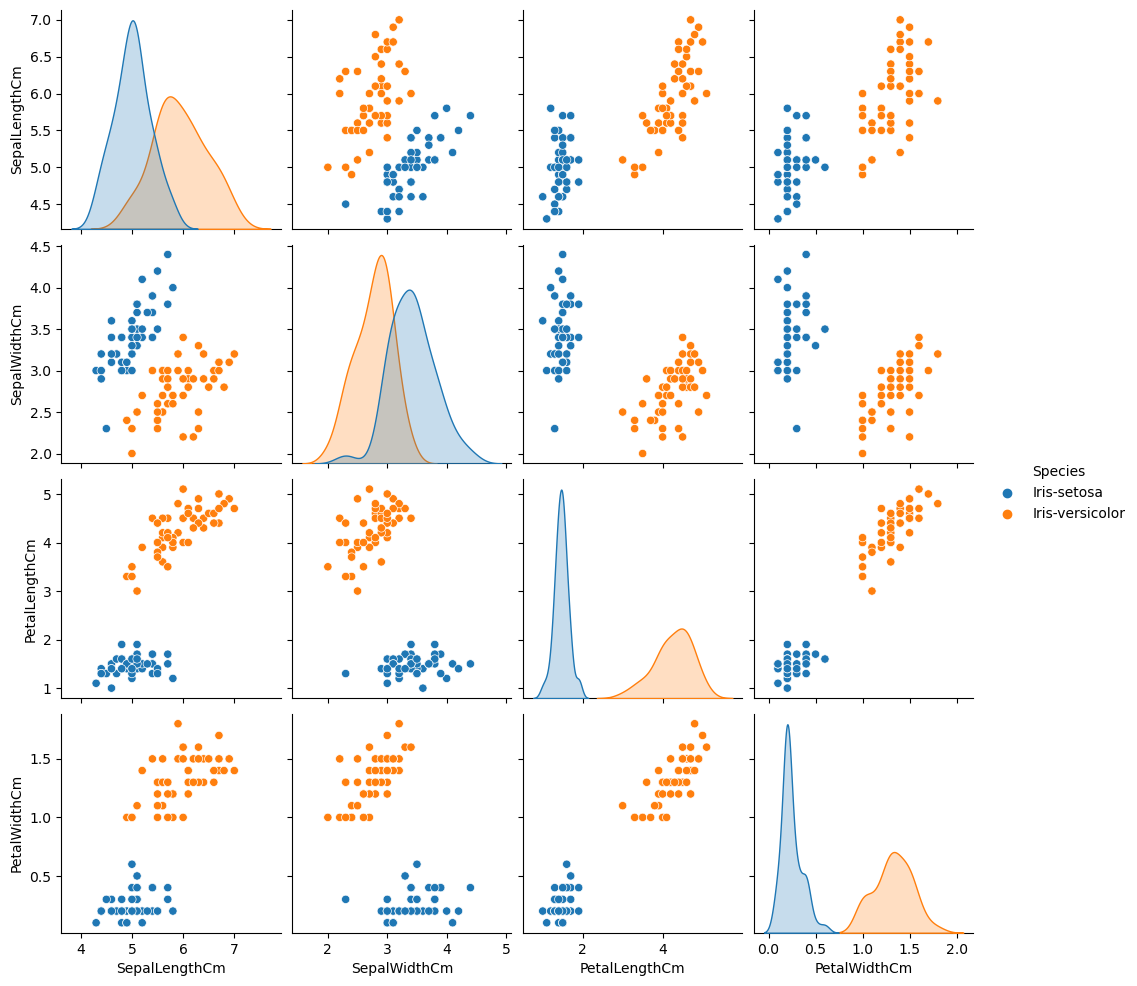

In [12]:
sns.pairplot(cleaned_data, hue='Species')
plt.show()

從以上可以看出，`setosa`和`versicolor`樣本的花瓣長度以及花瓣寬度的分布存在明顯數值上的不同，已經可以猜測假設檢驗的結果是，兩種鳶尾花的花瓣長度與寬度具有統計顯著性差異。

萼片的長度和寬度在分布上存在重疊，暫時無法僅通過圖表下結論，需要進行假設檢驗，以推斷整體的萼片長度和寬度之間是否有差異。

## 分析

利用假設檢驗，依次檢驗`setosa`和`versicolor`這兩種鳶尾花在萼片、花瓣的長度和寬度平均值方面，是否存在統計顯著性差異。

由於只有樣本數據，不知道總體的標準差，加上兩組樣本數各為50，樣本數量不大，因此進行t檢驗，而不是z檢驗。假設此數據集樣本符合t檢驗的兩個前提：樣本為隨機抽樣，總體呈正態分佈。

先引入t檢驗所需要的模組。

In [13]:
from scipy.stats import ttest_ind

### 分析萼片長度

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

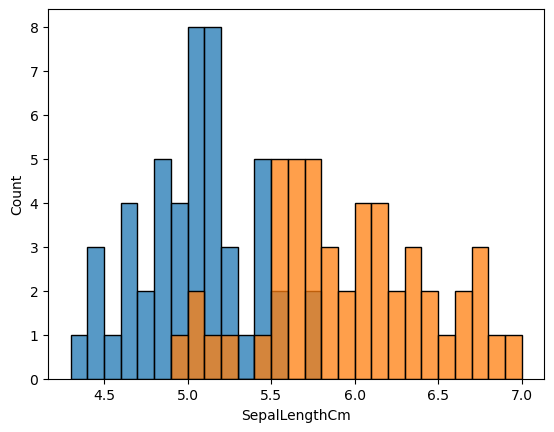

In [14]:
sns.histplot(iris_setosa['SepalLengthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['SepalLengthCm'], binwidth=0.1)
plt.show()

#### 建立假設

$H_0$：Setosa 鳶尾花和 Versicolor 鳶尾花萼片長度的平均值不存在顯著差異。

$H_1$：Setosa 鳶尾花和 Versicolor 鳶尾花萼片長度的平均值存在顯著差異。

雙尾檢驗、顯著水平 alpha=0.05

In [ ]:
t_stat, p_value = ttest_ind(iris_setosa['SepalLengthCm'], iris_versicolor['SepalLengthCm'])
print(f't值：{t_stat}')
print(f'p值：{p_value}')

t值：-10.52098626754911
p值：8.985235037487077e-18


結論：

由於 p 值小於顯著水平 0.05，我們因此拒絕原假設，說明 Setosa 鳶尾花和 Versicolor 鳶尾花萼片長度的平均值存在顯著差異。

### 分析花瓣長度

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

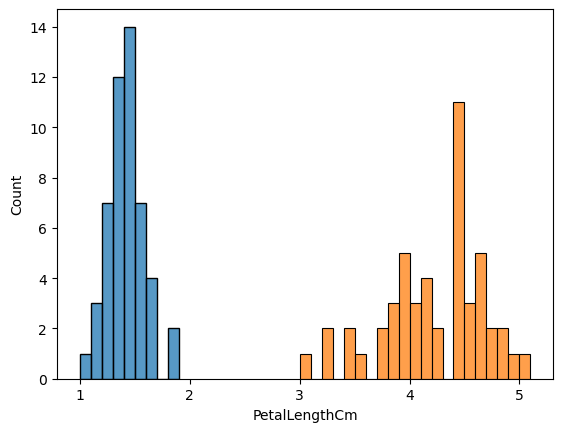

In [16]:
sns.histplot(iris_setosa['PetalLengthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['PetalLengthCm'], binwidth=0.1)
plt.show()

#### 建立假設

$H_0$：Setosa 鳶尾花和 Versicolor 鳶尾花花瓣長度的平均值不存在顯著差異。

$H_1$：Setosa 鳶尾花和 Versicolor 鳶尾花花瓣長度的平均值存在顯著差異。

雙尾檢驗、顯著水平 alpha=0.05

In [18]:
t_stat, p_value = ttest_ind(iris_setosa['PetalLengthCm'], iris_versicolor['PetalLengthCm'])
print(f't值：{t_stat}')
print(f'p值：{p_value}')

t值：-39.46866259397272
p值：5.717463758170621e-62


結論：

由於 p 值小於顯著水平 0.05，我們因此拒絕原假設，說明 Setosa 鳶尾花和 Versicolor 鳶尾花花瓣長度的平均值存在顯著差異。

### 分析花瓣寬度

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

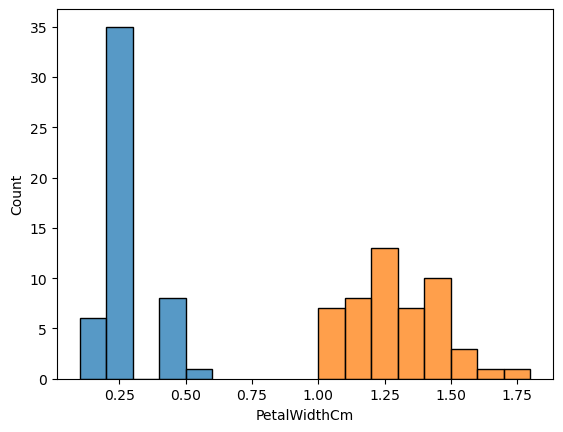

In [19]:
sns.histplot(iris_setosa['PetalWidthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['PetalWidthCm'], binwidth=0.1)
plt.show()

In [20]:
t_stat, p_value = ttest_ind(iris_setosa['PetalWidthCm'], iris_versicolor['PetalWidthCm'])
print(f't值：{t_stat}')
print(f'p值：{p_value}')

t值：-34.01237858829048
p值：4.589080615710866e-56


結論：

由於 p 值小於顯著水平 0.05，我們因此拒絕原假設，說明 Setosa 鳶尾花和 Versicolor 鳶尾花花瓣寬度的平均值存在顯著差異。

## 結論

透過上述分析過程，可以看到Setosa鳶尾花和Versicolor鳶尾花萼片、花瓣的長度和寬度平均值，均存在具有統計顯著性的差異。